# Исследование объявлений о продаже квартир

Данный проект посвящен исследованию данных о недвижимости в Санкт-Петербурге и его окрестностях за несколько лет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df_ = pd.read_csv('real_estate_data.csv',sep='\t')
df_.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df = df_.copy()

Для начала, получили базовое представление о данных: размеры таблицы, количество пропусков и дубликатов и т.д.

In [4]:
df.info

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

In [5]:
print(f'Длина таблицы: {len(df)}')
print(f'Количество явных дубликатов: {df.duplicated().sum()}')
print(f'Количество пропусков: {df.isna().sum().sum()}')

Длина таблицы: 23699
Количество явных дубликатов: 0
Количество пропусков: 101441


In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построили общую гистограмму для беглого анализа имеющихся метрик.

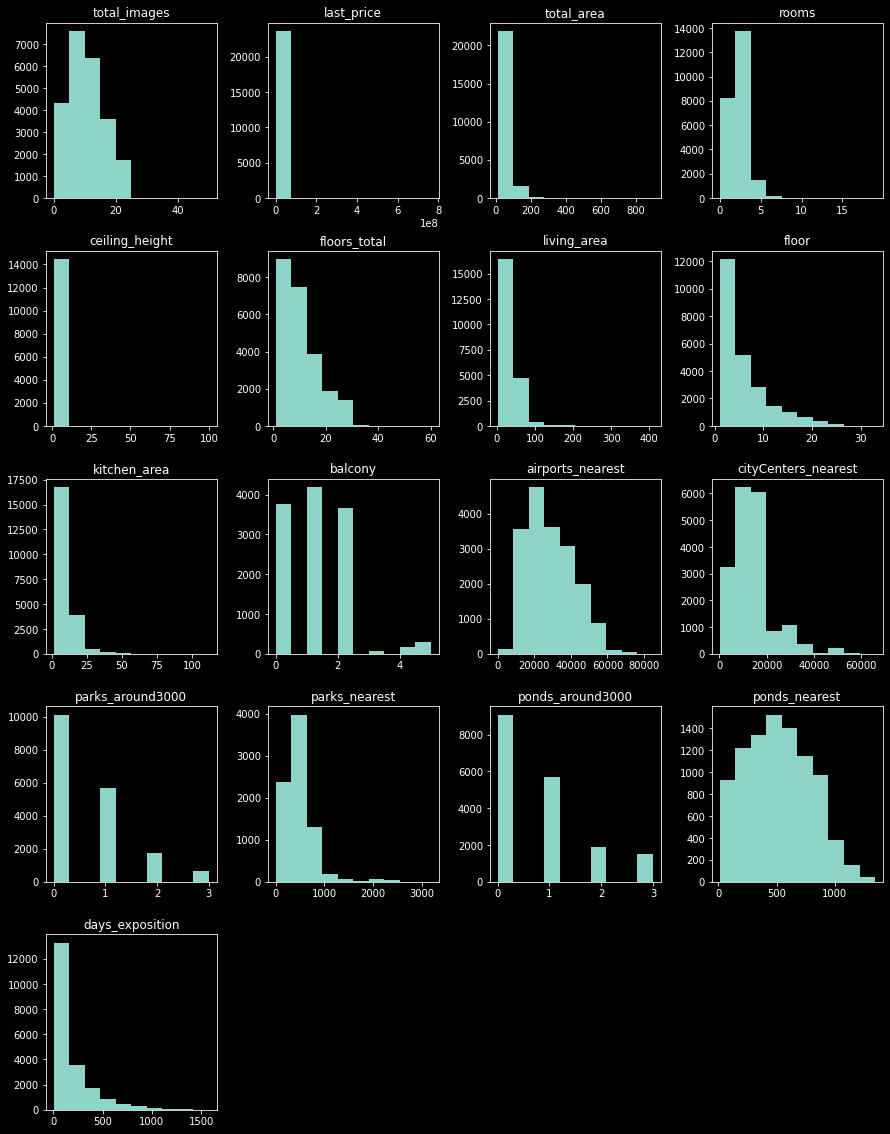

In [7]:
df.hist(figsize=(15, 20),grid=False)
plt.show()

Из полученной информации было ясно, что перед тем, как переходить к дальнейшему анализу, необходимо было обработать таблицу, разобраться с обнаруженными дубликатами и выбросами, исправить неправильно определенные типы данных и т.д.

### Предобработка данных

Вызвали метод, позволяющий увидеть, в каких именно столбцах таблицы имеются пропуски.

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# Доля пропусков:
np.around(df.isna().sum() / len(df),3)

total_images            0.000
last_price              0.000
total_area              0.000
first_day_exposition    0.000
rooms                   0.000
ceiling_height          0.388
floors_total            0.004
living_area             0.080
floor                   0.000
is_apartment            0.883
studio                  0.000
open_plan               0.000
kitchen_area            0.096
balcony                 0.486
locality_name           0.002
airports_nearest        0.234
cityCenters_nearest     0.233
parks_around3000        0.233
parks_nearest           0.659
ponds_around3000        0.233
ponds_nearest           0.616
days_exposition         0.134
dtype: float64

Для разных столбцов выбрали разные пути борьбы с пропусками:

1) Высота потолков разнится от квартиры к квартире не так сильно, как некоторые другие параметры, поэтому было решено заполнить пропуски медианным занчением по колонке. На всякий случай, чтобы не портить первоначальные данные, с этой целью был создан новый столбец.

In [10]:
ceiling_fix = df['ceiling_height'].median()
df['fixed_ceiling_height'] = df['ceiling_height'].fillna(ceiling_fix)

2) Пропуски в столбце "is_apartment" достаточно очевидно указывают на то, что на их месте должны стоять отметки False. По всей видимости, люди просто игнорировали данный параметр, думая, что он к ним не относится. 

In [11]:
def check_truthfulness(x):
    return x == True
df['is_apartment'] = df['is_apartment'].apply(check_truthfulness)

3) Столбец "living_area" решено было заполнить медианным значением по группам, в зависимости от количества комнат в квартире. Этот метод не является на 100% надежным, поэтому исправленные с его помощью данные тоже были помещены в новый столбец. 

In [12]:
lrm = df.groupby('rooms')['living_area'].median() 
lrm = pd.DataFrame(lrm)
lrm['rooms'] = lrm.index
lrm = lrm.reset_index(drop=True)
def change_area(row):
    la = row['living_area']
    r = row['rooms']
    if not np.isnan(la):
        return la
    else:
        for i in lrm['rooms']:
            if i == r:
                return float(lrm.loc[lrm['rooms'] == i,'living_area'])
    
df['fixed_living_area'] = df.apply(change_area,axis=1)    

4) Все данные типа "_nearest" и "_around" решено было оставить нетронутыми, поскольку, с очень высокой вероятностью, пропуски в них просто обозначают отсутиствие требуемых объектов в адекватной досягаемости от квартиры.

In [13]:
#df['airports_nearest'].value_counts()

In [14]:
#df['parks_around3000']

5) Пропуски в столбце "locality_name" за неимением лучших вариантов заменили на "неизвестно".

In [15]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')

6) Пропуски в "balcony" заменили на 0, исходя из предположения, что балконов в этих квартирах нет.

In [16]:
df['balcony'] = df['balcony'].fillna(0)

7) Относительно столбцов floors_total, kitchen_area и days_exposition адекватных вариантов замены найдено не было, потому пропуски в них тоже были оставлены.

In [17]:
#df.head(30)

В целом, можно говорить о том, что пропуски в картографических данных сами по себе достаточно информативны и дают полезную информацию об отсутствии тех или иных объектов вблизи от жилья. Пользователькие же пропуски появились или вследствие ошибкок при заполнении, или из-за желания продавца утаить ту или иную информацию о квартире, что, разумеется, негативно сказывается на процессе анализа. 

Затем перешли к предобработке типов данных.

In [18]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
fixed_ceiling_height    float64
fixed_living_area       float64
dtype: object

Исправить  решено было столбец с датой публикации, поскольку он явно имел форму Datetime. 

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Кроме того, столбцы с количественными переменными решено было перевести в целочисленный тип, чтобы избавиться от лишних нулей.

In [20]:
df['floors_total'] = df['floors_total'].astype('Int32')
df['balcony'] = df['balcony'].astype('Int32')
df['parks_around3000'] = df['parks_around3000'].astype('Int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int32')

Переменные, обозначающие расстояние, площадь или цену оставили вещественными.

Затем начался этап анализа неявных дубликатов.

Для этого сперва был создан отдельный DataFrame с названиями населенных пунктов и количеством их упоминаний.

In [21]:
ln = pd.DataFrame(df['locality_name'].value_counts().sort_values())
ln['locality'] = ln.index
ln = ln.rename(columns = {'locality_name' : 'count'})
ln = ln.reset_index(drop=True)
ln.style

,count,locality
0,1,коттеджный поселок Счастье
1,1,деревня Реброво
2,1,садовое товарищество Садко
3,1,деревня Зимитицы
4,1,поселок Гаврилово
5,1,посёлок Сумино
6,1,деревня Чудской Бор
7,1,поселок Тёсово-4
8,1,деревня Борисова Грива
9,1,деревня Новолисино


На основании полученной таблицы была сделана еще одна. В ней из каждого названия бралось только последнее слово, по которому затем искались дубликаты в основной таблице. Такой подход позволил сузить круг населенных пунктов, которые необходимо было проверить на дублирование.

In [22]:
ln_0 = []
for i in ln['locality']:
    i = i.split(' ')
    ln_0.append(i[-1])
ln_0 = pd.DataFrame(sorted(ln_0))
ln_d = pd.DataFrame(ln_0.duplicated())
ln_0 = ln_0.join(ln_d,lsuffix='_name',rsuffix='_dup')
ln_0 = ln_0.rename(columns={'0_name' : 'name','0_dup' : 'dup'})
ln_0.loc[ln_0['dup']==True].style

,name,dup
4,Аннино,True
9,Бегуницы,True
14,Бор,True
15,Бор,True
16,Бор,True
17,Бор,True
18,Бор,True
19,Бор,True
20,Бор,True
22,Бугры,True


**Заключение:** Старые и Новые Бегуницы признаны разными населенными пунктами, повторений среди поселений со словом "Бор" в названии не было найдено, поселок при станции Вещево обозначался разными способами и требовал исправления, поселок и деревня Гарболово на поверку оказались одним и тем же населенным пунктом, дубликатов на званий со словом "Горка" найдено не было, поселок Громово и поселок при станции Громово оказались один и тем же местом, то же самое относится и к Зимитцам; Для Большой Ижоры решено было исправить городской поселок на поселок городского типа, для Калитино - деревню на поселок. Колпаны оказались разделены на Большие и Малые и остались нетронутыми, то же самое произошло с Ладогой. Кудрово без тега получило преписку деревня, а Любань и Мурино - преписку поселок, поселок Лесное стал коттеджным, городской поселок Лесогорский, Мга и Назия получили более официальную категорию по аналогии с Ижорой. Никольское без тега получило преписку село, поселок городского типа Павлово и село Павлово признаны разными, однако формулировка "городской поселок" требовала исправления. Приветинское требовало изменения формулировки по станции, СНТ Приладожский и Рахья были признаны отличными от аналогичных поселков городского типа, а вот деревню и поселок Рабитцы решено было объединить. Романовка и Малая Романовка оказались отличны, точно так же, как и разные Ропши. Рощино,Рябово и Советский постигла участь Ижоры. Наконец Федоровское стало деревней, а Щеглово - поселком. 

In [23]:
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа')

df['locality_name'] = df['locality_name'].replace('деревня Гарболово','поселок Гарболово')
df['locality_name'] = df['locality_name'].replace('поселок станции Громово','поселок Громово')
df['locality_name'] = df['locality_name'].replace('деревня Зимитицы','поселок Зимитцы')
df['locality_name'] = df['locality_name'].replace('деревня Калитино','поселок Калитино')
df['locality_name'] = df['locality_name'].replace('Кудрово','деревня Кудрово')
df['locality_name'] = df['locality_name'].replace('поселок Лесное','коттеджный поселок Лесное')
df['locality_name'] = df['locality_name'].replace('Любань','поселок Любань')
df['locality_name'] = df['locality_name'].replace('Мурино','поселок Мурино')
df['locality_name'] = df['locality_name'].replace('Никольское','село Никольское')
df['locality_name'] = df['locality_name'].replace('деревня Рабитицы','поселок Рабитицы')
df['locality_name'] = df['locality_name'].replace('поселок Рябово','поселок городского типа Рябово')
df['locality_name'] = df['locality_name'].replace('городской поселок Фёдоровское','деревня Фёдоровское')
df['locality_name'] = df['locality_name'].replace('деревня Щеглово','поселок Щеглово')

In [24]:
ln = pd.DataFrame(df['locality_name'].value_counts().sort_values())
ln['locality'] = ln.index
ln = ln.rename(columns = {'locality_name' : 'count'})
ln = ln.reset_index(drop=True)
len(ln)

311

Длина таблицы после изменения сократилась. Следовательно, задача была выполнена успешно.

Затем провели работу с выбивающимися значениями.

In [25]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fixed_ceiling_height,fixed_living_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.70,51.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.65,18.6
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2.65,34.3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,2.65,45.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.03,32.0


Среди данных "total_area" было лишь одно выбивающееся значение в 900 квадратных метров, однако оно вполне сочеталось с остальными данными о жилище (к примеру, о наличии 12 квартир), поэтому не являлось ошибкой.

In [26]:
#df['total_area'].sort_values(ascending=False)
#df.loc[19540,:]

Среди данных о количестве комнат попадались квартиры, в которых комнат было 0. Объяснить эту аномалию как-либо, кроме как ошибкой, возможным не представлялось, потому эти объявления решено было удалить.

In [27]:
#df['rooms'].unique()
df = df.loc[df['rooms'] != 0]

Среди данных о высотке потолков есть неправдоподобно большие значения.

In [28]:
len(df.loc[df['ceiling_height']>11]) / len(df['ceiling_height']) 

0.000978640115734831

Доля таких значений, впрочем, совсем невелика, так что решено было удалить эти данные из таблицы.

In [29]:
df = df.loc[df['ceiling_height'] < 11]

На всякий случай, проверили, нет ли среди данных противоречащих друг другу столбцов.

In [30]:
len(df.loc[(df['living_area']+df['kitchen_area']) > df['total_area']])
#df.loc[df['floor'] > df['floors_total']]

40

У некоторых квартир сумма жилой и кухонной площадей превосходила общую площадь. Это было крайне трудно объяснить логически, потому решено было избавиться от подобных объявлений.

In [31]:
df = df.loc[(df['living_area']+df['kitchen_area']) <= df['total_area']]

Проверка прочих столбцов никаких аномалий не выявила.

### Создание новых столбцов

In [32]:
#df

На этом этапе добавили в таблицу ряд новых столбцов.

1) Цена одного квадратного метра:

In [33]:
df['price_pm'] = np.around(df['last_price']/df['total_area'],3)

2) День публикации:

In [34]:
df['publication_day'] = df['first_day_exposition'].dt.dayofweek

3) Месяц публикации:

In [35]:
df['publication_month'] = df['first_day_exposition'].dt.month

4) Год публикации:

In [36]:
df['publication_year'] = df['first_day_exposition'].dt.year

5) Тип этажа:

In [37]:
def floor_t(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка'
df['floor_type'] = df.apply(floor_t,axis=1)

6) Расстояние до центра города в километрах:

In [38]:
df['city_centre_km'] = np.around(df['cityCenters_nearest']/1000,0).astype('Int64')

In [39]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,fixed_ceiling_height,fixed_living_area,price_pm,publication_day,publication_month,publication_year,floor_type,city_centre_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,2.70,51.0,120370.370,3,3,2019,другой,16
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,3.03,32.0,100000.000,1,6,2018,другой,8
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,2.50,43.6,88524.590,6,2,2017,другой,15
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,2.67,20.3,127525.253,3,11,2017,другой,14
13,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,False,...,298.0,366.0,2.56,27.0,82943.925,5,7,2017,последний,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,652.0,29.0,2.86,16.3,100566.572,2,2,2018,другой,16
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519.0,2.75,40.3,129903.978,3,10,2016,другой,4
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,675.0,239.0,2.60,40.0,73717.949,4,8,2016,другой,34
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,NaN,3.70,73.3,72490.845,1,3,2017,другой,4


### Исследовательский анализ данных

Перешли к исследовательскому анализу различных показателей из таблицы.

### Анализ площадей:

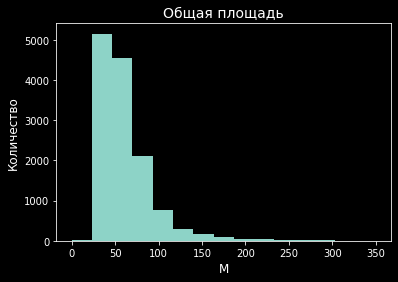

In [40]:
df['total_area'].plot(kind='hist',bins=15,range=(0,350),figsize=(6,4),grid=False)
plt.title('Общая площадь',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

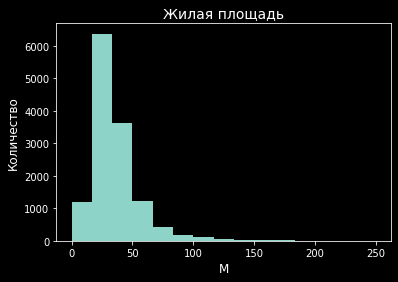

In [41]:
df['living_area'].plot(kind='hist',bins=15,range=(0,250),grid=False,figsize=(6,4))
plt.title('Жилая площадь',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

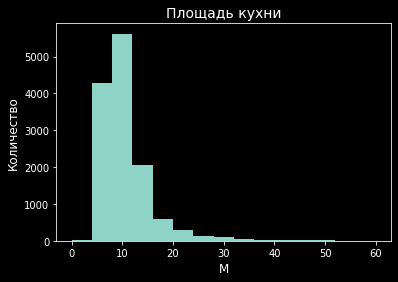

In [42]:
df['kitchen_area'].plot(kind='hist',bins=15,range=(0,60),grid=False,figsize=(6,4))
plt.title('Площадь кухни',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Построение гистограмм разброса данных по общей площади, жилой площади и площади кухни позволило установить, что большая часть квартир в списке объявлений находится в диапазоне от 50 до 100 квадратных метров общей площади. Для жилой площади этот показатель варьируется примерно от 30 до 50, а для площади кухонь - от 5 до 15.

In [43]:
area_parts = pd.DataFrame(columns = ['total','living_part','kitchen_part'])
area_parts['total'] = df['total_area']
area_parts['total_part'] = 1
area_parts['living_part'] = np.around(df['living_area'] / df['total_area'],2)
area_parts['kitchen_part'] = np.around(df['kitchen_area'] / df['total_area'],2)
area_parts = area_parts.dropna().reset_index(drop=True)
ap_ = {'total' : 1,'living' : area_parts['living_part'].median(),'kitchen' : area_parts['kitchen_part'].median()}
ap = pd.Series(ap_,index=['total','living','kitchen'])

Для большего понимания была также создана небольшая таблица, отражающая медианное соотношение жилой и кухонной площадей к общей площади квартиры.

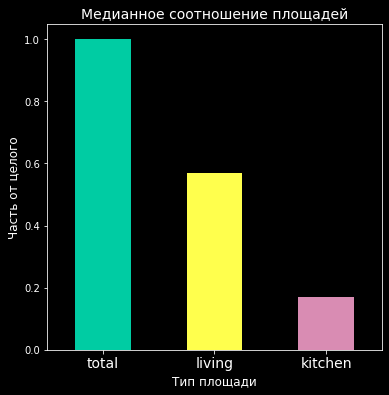

In [44]:
color=['#00cca3','#ffff4d','#d98cb3']
ap.plot(kind='bar',figsize=(6,6),color=color)
plt.title('Медианное соотношение площадей',fontsize=14)
plt.xlabel('Тип площади',fontsize=12)
plt.ylabel('Часть от целого',fontsize=12)
plt.xticks(rotation=0,fontsize=14)
plt.show()

Как видно из полученного графика, жилая площадь в представленных квартирах составляет порядка 60% от общей, а кухня - около 20%.

### Общие характеристики:

Чтобы проанализировать разброс цен, решено было поделить их на категории по квантилям:

In [45]:
df['last_price'].describe() / 1000000

count      0.013276
mean       6.815887
std       10.133594
min        0.012190
25%        3.600000
50%        4.900000
75%        7.000000
max      420.000000
Name: last_price, dtype: float64

In [46]:
def price_type(x):
    if x > 0 and x < 1219000:
        return '0 - 1.219 млн.'
    elif x > 1219000 and x < 4650000:
        return '1.219 - 4.65 млн.'
    elif x > 4650000 and x < 6800000:
        return '4.65 - 6.8 млн.'
    else:
        return '>6.8 млн.'

df['price_type'] = df['last_price'].apply(price_type)

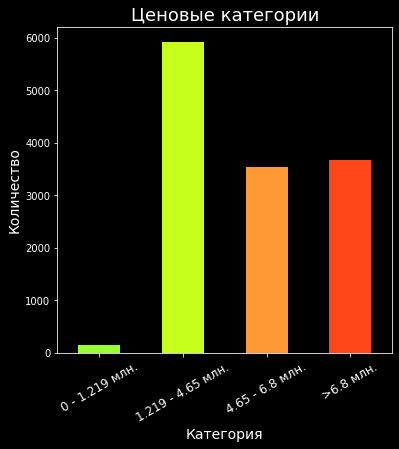

In [47]:
color=['#99ff33','#c6ff1a','#ff9933','#ff471a']
df.groupby('price_type')['last_price'].count().plot(kind='bar',figsize=(6,6),color=color)
plt.title('Ценовые категории',fontsize=18)
plt.xlabel('Категория',fontsize=14)
plt.ylabel('Количество',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()

Как итог, стало ясно, что большая часть квартир продаются по цене от 1.2 до 4.6 миллионов рублей. Суммарно примерно столько же квартир продается по цене выше данного порога, а вот квартир дешевле пренебрежимо мало.

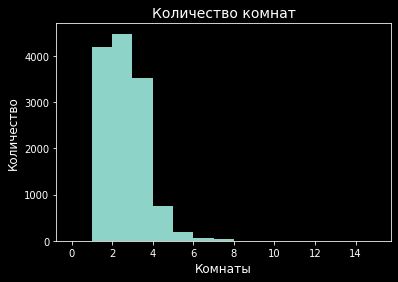

In [48]:
df['rooms'].plot(kind='hist',bins=15,range=(0,15),grid=False,figsize=(6,4))
plt.title('Количество комнат',fontsize=14)
plt.xlabel('Комнаты',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Что касается комнат, то в большинстве квартир их от 1 до 4. Показатели больше встречаются в таблице довольно редко.

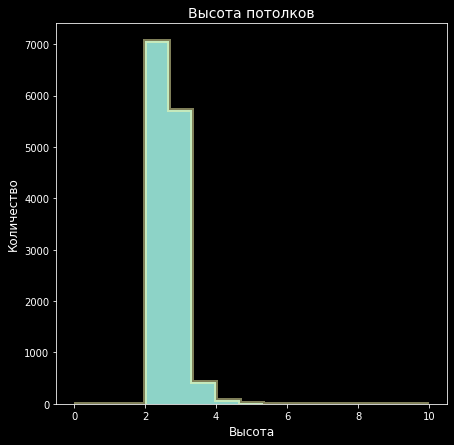

In [49]:
ax = df['ceiling_height'].plot(kind='hist',bins=15,range=(0,10),grid=False,figsize=(7,7))
plt.title('Высота потолков',fontsize=14)
df['fixed_ceiling_height'].plot(kind='hist',bins=15,range=(0,10),grid=False,ax=ax,histtype='step',linewidth=4,alpha=0.5)
plt.xlabel('Высота',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Наиболее распространенные высоты потолков расположились на уровне в 2-3 метра. Контуром на данном графики показаны данные с включением столбца с пропусками, заполненни медианным значением. 

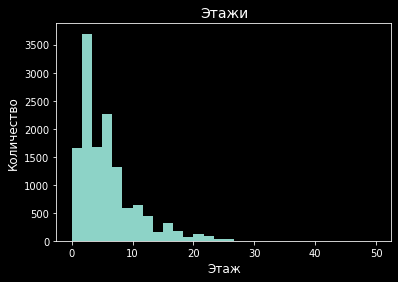

In [50]:
df['floor'].plot(kind='hist',bins=30,range=(0,50),grid=False,figsize=(6,4))
plt.title('Этажи',fontsize=14)
plt.xlabel('Этаж',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Больше всего квартир расположено на 2 этаже. Основная масса квартир приходится на этажи со второго по девятый.

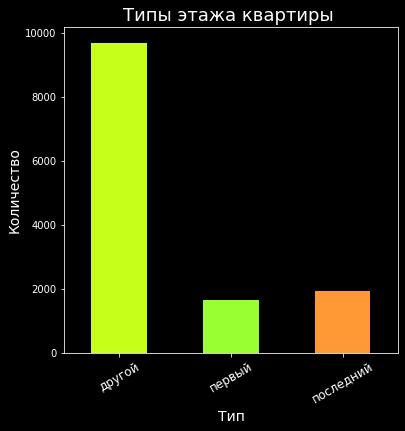

In [51]:
color=['#c6ff1a','#99ff33','#ff9933','#ff471a']
df.loc[df['floor_type'] != 'ошибка'].groupby('floor_type')['floor_type'].count().plot(kind='bar',figsize=(6,6),color=color)
plt.title('Типы этажа квартиры ',fontsize=18)
plt.xlabel('Тип',fontsize=14)
plt.ylabel('Количество',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()

На первый и последний этажи приходятся примерно поровну квартир с небольшим перевесом в сторону последних. Одако большинство квартир все же находится где-то в промежутке.

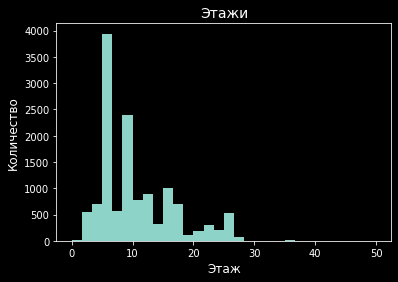

In [52]:
df['floors_total'].plot(kind='hist',bins=30,range=(0,50),grid=False,figsize=(6,4))
plt.title('Этажи',fontsize=14)
plt.xlabel('Этаж',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Если рассматривать общее количество этажей в домах, то сильнее всего выбиваться будут показатели в 5 и 9 этажей. В остальном, распределение идет достаточно равномерно, уменьшаясь лишь ближе к 30.

### Картографические характеристики

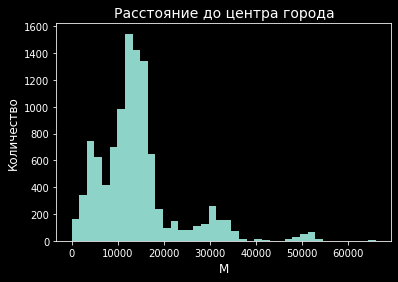

In [53]:
df['cityCenters_nearest'].plot(kind='hist',bins=40,range=(0,66000),grid=False,figsize=(6,4))
plt.title('Расстояние до центра города',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Расстояние от центра города в большинстве квартир варьируется в диапазоне от 10 до 20 км. Стоит, впрочем, понимать, что в данном распределении фигурируют только те квартиры, в которых данный показатель вообще указан.

In [54]:
df['cityCenters_nearest'].isna().sum() / len(df['cityCenters_nearest'])

0.19682133172642363

Таких квартир в таблице около 19%.

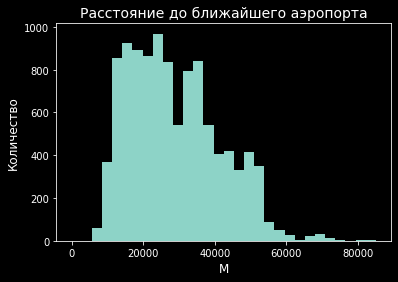

In [55]:
df['airports_nearest'].plot(kind='hist',bins=30,range=(0,85000),grid=False,figsize=(6,4))
plt.title('Расстояние до ближайшего аэропорта',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

*Число пропусков:*

In [56]:
f"{np.around(df['airports_nearest'].isna().sum() / len(df['airports_nearest']),4)*100}%"

'19.830000000000002%'

Распределение расстояний до аэропорта более плавно и не имеет особых выбросов. Небольшое преимущество по количеству имеют квартиры в 35-40 км. от аэропорта.

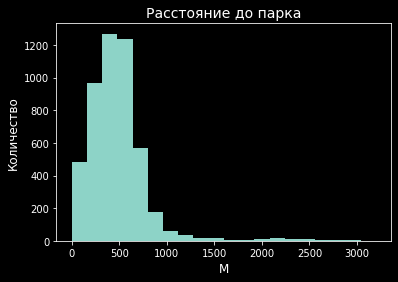

In [57]:
df['parks_nearest'].plot(kind='hist',bins=20,range=(0,3200),grid=False,figsize=(6,4))
plt.title('Расстояние до парка',fontsize=14)
plt.xlabel('М',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

*Число пропусков:*

In [58]:
f"{np.around(df['parks_nearest'].isna().sum() / len(df['parks_nearest']),2)*100}%"

'63.0%'

В случае с парками, чаще всего расстояние до них ограничивается менее чем одним километром. Однако количество пропусков в этих данных составляет огромные 63%. Следовательно, парки или есть в пешей доступности, или их нет вовсе.

### День и месяц:

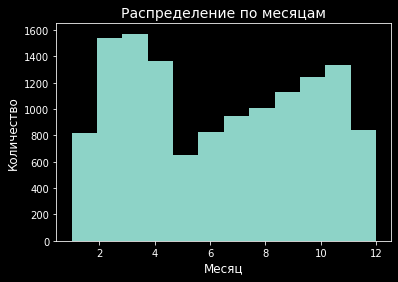

In [59]:
df['publication_month'].plot(kind='hist',bins=12,grid=False,figsize=(6,4))
plt.title('Распределение по месяцам',fontsize=14)
plt.xlabel('Месяц',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Больше всего объявлений выкладывается в феврале, марте и ноябре. В преддверии нового года и в середине года объявлений, как правило, становится меньше.

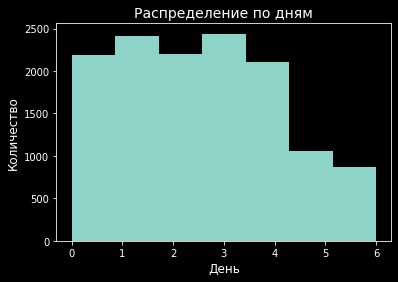

In [60]:
df['publication_day'].plot(kind='hist',bins=7,grid=False,figsize=(6,4))
plt.title('Распределение по дням',fontsize=14)
plt.xlabel('День',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

Распределение по дням, в свою очередь, ясно показывает, что в будни объявления выкладываются значительно чаще, чем по выходным.

### Скорость продажи:

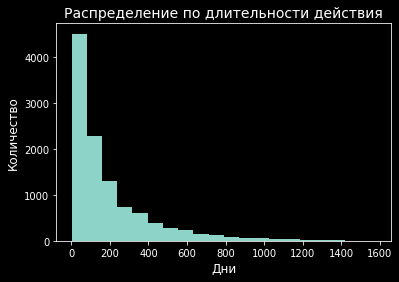

In [61]:
df['days_exposition'].plot(kind='hist',bins=20,grid=False,figsize=(6,4))
plt.title('Распределение по длительности действия',fontsize=14)
plt.xlabel('Дни',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

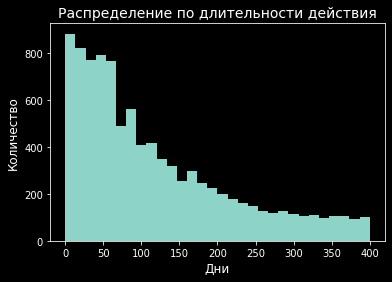

In [62]:
df['days_exposition'].plot(kind='hist',bins=30,range=(0,400),grid=False,figsize=(6,4))
plt.title('Распределение по длительности действия',fontsize=14)
plt.xlabel('Дни',fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

In [63]:
df['days_exposition'].describe()

count    11004.000000
mean       192.879589
std        229.201690
min          1.000000
25%         45.000000
50%        107.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

В распределении по длительности действия объявления прослеживается следующая логичная тенденция: чем больше времени проходит, тем меньше объявлений остаются нерассмотренными. Большая часть квартир оказывается продана меньше чем за 100 дней. Это подтверждается медианным значением в 102 дня. Среднее значение здесь составляет 185 дней, поскольку оно искревлено выбросами в виде объявлений, остающихся активными более чем 1000 дней. Такие в таблице тоже есть, но они являются скорее исключениями. В целом, можно считать, что необычно долгие продажи начинаются с 407 дней (среднее + СКО), а необычно быстрые проходят за время с 1 дня до 45 (первый квантиль).

Перед анализом зависимостей, провели дополнительную работу с выбросами.

In [64]:
df = df.loc[df['ceiling_height'] > 2.5]

### Зависимость цены от прочих факторов:

In [65]:
pta = df.loc[:,['last_price','total_area']]
pta.corr()

,last_price,total_area
last_price,1.000000,0.701945
total_area,0.701945,1.000000


In [66]:
pla = df.loc[:,['last_price','living_area']]
pla.corr()

,last_price,living_area
last_price,1.000000,0.611745
living_area,0.611745,1.000000


In [67]:
pka = df.loc[:,['last_price','kitchen_area']]
pka.corr()

,last_price,kitchen_area
last_price,1.000000,0.523993
kitchen_area,0.523993,1.000000


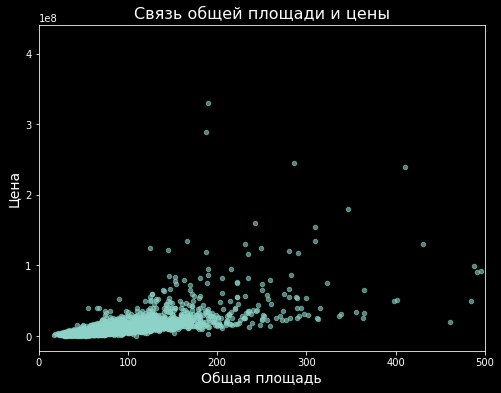

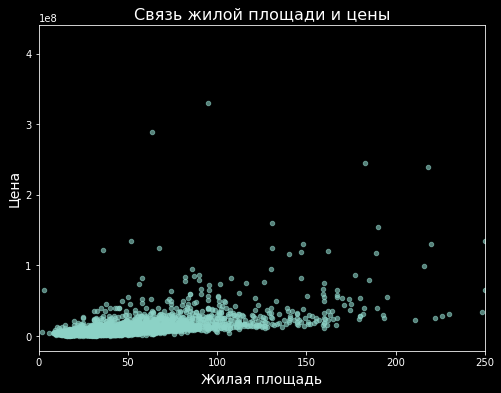

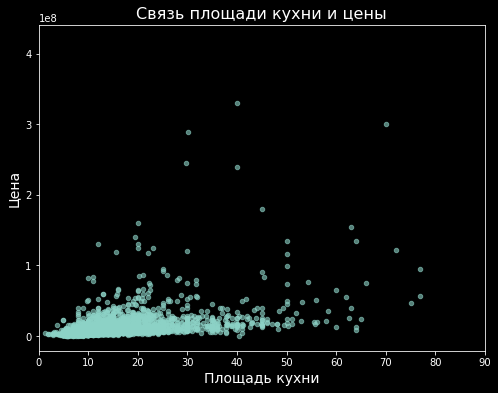

In [68]:
pta.plot(kind='scatter',x='total_area',y='last_price',grid=False,figsize=(8,6),alpha=0.6)
plt.title('Связь общей площади и цены',fontsize=16)
plt.xlabel('Общая площадь',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.xlim(0,500)
plt.show()
pla.plot(kind='scatter',x='living_area',y='last_price',grid=False,figsize=(8,6),alpha=0.6)
plt.title('Связь жилой площади и цены',fontsize=16)
plt.xlabel('Жилая площадь',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.xlim(0,250)
plt.show()
pka.plot(kind='scatter',x='kitchen_area',y='last_price',grid=False,figsize=(8,6),alpha=0.6)
plt.title('Связь площади кухни и цены',fontsize=16)
plt.xlabel('Площадь кухни',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.xlim(0,90)
plt.show()

Анализ корреляции между ценой и площадью оказался несколько неоднозначным. Что касается общей площади, то коэффициент Пирсона для нее составил 0.7, что является достаточно значимым показателем. Однако анализ графика показывает, что рост цены при увеличении площади квартиры идет крайне медленно и сопровождается большим количеством выбросов как в одну сторону, так и в другую. То же самое, но еще в большей степени, относится и к жилой площади, и к площади кухни. Кроме того, начиная с определенного момента, зависимость между площадью и ценой пропадает вовсе. Поэтому, будет справедливо сказать, что зависимость между площадью и ценой существует, однако она не так велика, как может показаться.

In [69]:
pr = df.loc[:,['last_price','rooms']]
pr.corr()

,last_price,rooms
last_price,1.000000,0.415736
rooms,0.415736,1.000000


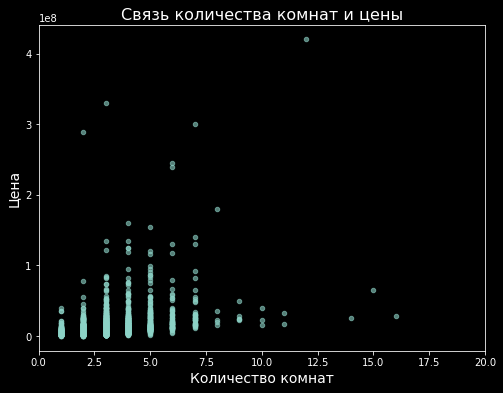

In [70]:
pr.plot(kind='scatter',x='rooms',y='last_price',grid=False,figsize=(8,6),alpha=0.6)
plt.title('Связь количества комнат и цены',fontsize=16)
plt.xlabel('Количество комнат',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.xlim(0,20)
plt.show()

Связь между ценой и числом комнат еще менее очевидна. С увеличением количества комнат появляются все более дорогие объекты, но при этом общий разброс цен остается достаточно большим, так что говорить о строгой положительно корреляции не приходится. Низкий коэффициент в 0.39 подтверждает это.

In [71]:
pf = df.loc[:,['last_price','floor_type','floor']]
pf = pf.loc[pf['floor_type'] != 'ошибка']
pf.corr()

,last_price,floor
last_price,1.000000,0.011408
floor,0.011408,1.000000


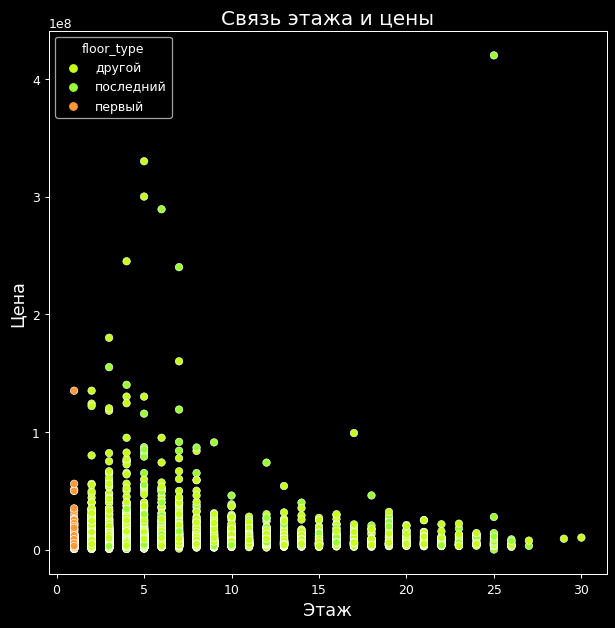

In [72]:
color=['#c6ff1a','#99ff33','#ff9933']
plt.figure(figsize=(8,8),dpi=90)
sns.scatterplot(data=pf,x='floor',y='last_price',hue='floor_type',palette=color)
plt.title('Связь этажа и цены',fontsize=16)
plt.xlabel('Этаж',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.show()

Исследование взаимосвязи этажа квартиры и ее цены показало, что совокупность более дорогих объектов сконцентрирована на более низких этажах (с 1 по 10). Далее, чем выше этаж, тем ниже цены. При этом не имеет значения, является тот или иной этаж последним в доме или нет. Об этом свидетельствует разброс оранжевых точек на графике выше.

In [73]:
pfm = df.groupby('floor_type')['last_price'].mean() / 1000000
pfm = pfm.loc[pfm.index != 'ошибка']
pfm

floor_type
другой       7.799895
первый       5.656503
последний    8.969550
Name: last_price, dtype: float64

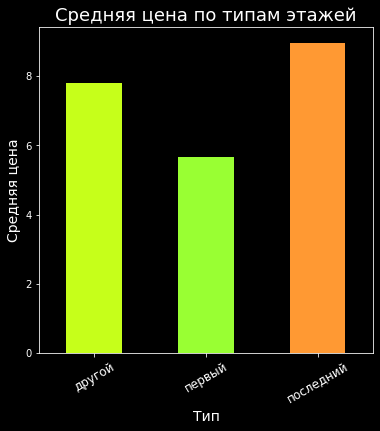

In [74]:
color=['#c6ff1a','#99ff33','#ff9933','#ff471a']
pfm.plot(kind='bar',figsize=(6,6),color=color)
plt.title('Средняя цена по типам этажей',fontsize=18)
plt.xlabel('Тип',fontsize=14)
plt.ylabel('Средняя цена',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()

График по средним ценам, впрочем, показывает, что среднее значение цены выше у квартир на последнем этаже. Скорее всего, это связано с тем, что таких данных в таблице немного и они содержат больше выбивающихся значений. Эти выбросы и перетягивают среднее значение на себя.

In [75]:
pdm = df.groupby('publication_day')['last_price'].mean() / 1000000
pdm

publication_day
0    8.050503
1    7.800953
2    7.751990
3    8.013415
4    7.360528
5    7.010525
6    7.367610
Name: last_price, dtype: float64

In [76]:
pmm = df.groupby('publication_month')['last_price'].mean() / 1000000
pmm

publication_month
1     7.939521
2     7.610652
3     7.234656
4     8.367945
5     7.680430
6     7.214594
7     7.908535
8     7.657749
9     7.571234
10    7.366962
11    7.462906
12    8.930162
Name: last_price, dtype: float64

In [77]:
pym = df.groupby('publication_year')['last_price'].mean() / 1000000
pym

publication_year
2014    13.304489
2015    10.511136
2016     7.479682
2017     7.936934
2018     7.000187
2019     8.043006
Name: last_price, dtype: float64

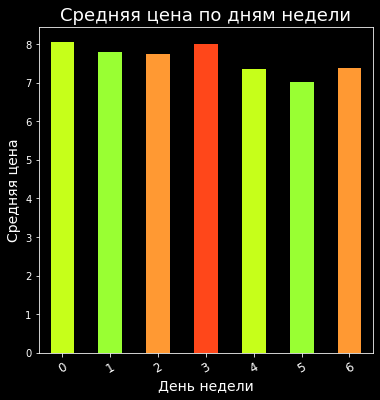

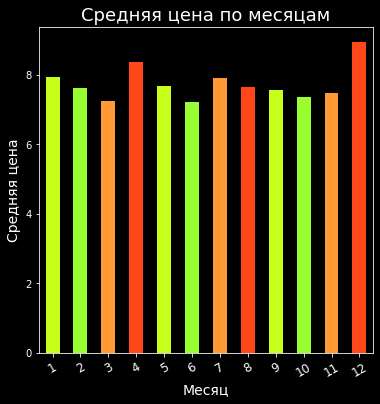

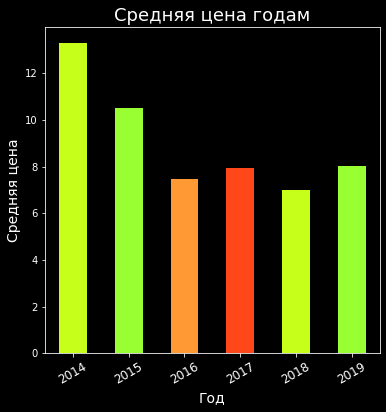

In [78]:
color=['#c6ff1a','#99ff33','#ff9933','#ff471a']
pdm.plot(kind='bar',figsize=(6,6),color=color)
plt.title('Средняя цена по дням недели',fontsize=18)
plt.xlabel('День недели',fontsize=14)
plt.ylabel('Средняя цена',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()
pmm.plot(kind='bar',figsize=(6,6),color=color)
plt.title('Средняя цена по месяцам',fontsize=18)
plt.xlabel('Месяц',fontsize=14)
plt.ylabel('Средняя цена',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()
pym.plot(kind='bar',figsize=(6,6),color=color)
plt.title('Средняя цена годам',fontsize=18)
plt.xlabel('Год',fontsize=14)
plt.ylabel('Средняя цена',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.show()

Что касается данных по времени публикации заявления, то день влияет на цену очень слабо. При этом зимой и в начале весны выбросов в ценах становится больше и появляются более дорогие квартиры. Наиболее репрезентативной является график сравнения цен по годам. На нем отчетливо видно, что в 2014 и 2015 году цены были значительно выше, чем в последующие года. Начиная с 2016 года, цены оставались на приблизительно равном уровне.

### Разброс цен по населенным пунктам:

Выбрали населенные пункты с наибольшим числом объявлений:

In [79]:
topdf_names = df.value_counts('locality_name').head(10)
topdf_names

locality_name
Санкт-Петербург      7279
Всеволожск            217
поселок Мурино        186
поселок Шушары        175
деревня Кудрово       165
Пушкин                149
поселок Парголово     116
Петергоф               97
Колпино                96
Сестрорецк             95
dtype: int64

Отфильтровали таблицу, оставив там только нужные населенные пункты:

In [80]:
topdf = df.query('locality_name in @topdf_names.index')

Посчитали среднюю цену за квадратный метр в них:

In [81]:
topdf_price = topdf.groupby('locality_name')['price_pm'].mean()
topdf_price.sort_values(ascending=False)

locality_name
Санкт-Петербург      118807.014025
Пушкин               107559.131060
Сестрорецк           103820.175653
деревня Кудрово       95838.767830
поселок Парголово     91034.971362
поселок Мурино        87010.113812
Петергоф              85639.795443
поселок Шушары        79661.268617
Колпино               76494.632812
Всеволожск            68131.136968
Name: price_pm, dtype: float64

**Как итог:** населенный пункт с наиболее высокой стоимостью одного квадратного метра - Санкт-Петербург (113875 тыс. рублей). В свою очередь, населенный пункт с наиболее низкой стоимостью одного квадратного метра из 10 представленных - Выборг (58319 тыс. рублей).

### Влияние расстояния до центра на цену:

Создали фильтр и получили объявления по Санкт-Петербургу:

In [82]:
spb_ = df.loc[df['locality_name']  == "Санкт-Петербург"]
spb = spb_.copy()

Убрали из списка пропуски и нули, чтобы избежать ошибок и бесконечностей в вычислениях:

In [83]:
def null_removal(x):
    if x == 0:
        return x+1
    else:
        return x
spb = spb.dropna().reset_index(drop=True)
spb['city_centre_km'] = spb['city_centre_km'].apply(null_removal)

Создали столбец с ценами за 1 километр:

In [84]:
spb['price_pkm'] = np.around(spb['last_price'] / spb['city_centre_km'],3)

In [85]:
spb['price_pkm'].describe()

count    1.743000e+03
mean     3.170612e+06
std      1.115614e+07
min      1.134615e+05
25%      4.087121e+05
50%      1.000000e+06
75%      2.480306e+06
max      3.300000e+08
Name: price_pkm, dtype: float64

В данном случае, разброс цен оказался крайне велик, однако среднее значение составило приблизительно 2.7 млн. рублей. Данная метрика, впрочем, является достаточно сомнительным показателем для анализа, поскольку она зависит от слишком большого количества переменных и может меняться как из-за удаления от центра, так и из-за понижения цены квартиры.

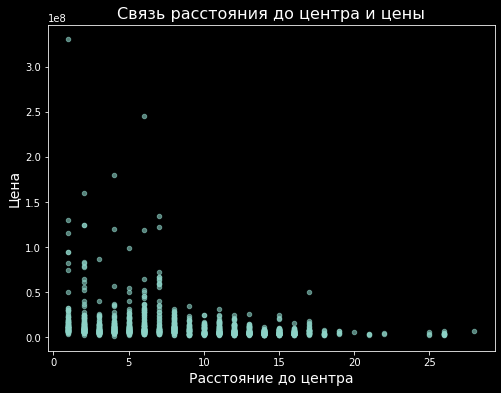

In [86]:
spb.plot(kind='scatter',x='city_centre_km',y='last_price',grid=False,figsize=(8,6),alpha=0.6)
plt.title('Связь расстояния до центра и цены',fontsize=16)
plt.xlabel('Расстояние до центра',fontsize=14)
plt.ylabel('Цена',fontsize=14)
plt.show()

In [87]:
spb.loc[:,['last_price','city_centre_km']].corr()

,last_price,city_centre_km
last_price,1.000000,-0.265208
city_centre_km,-0.265208,1.000000


В целом же, график дает понять, что зависимость цены от близости к центру действительно есть и достаточно существенная. На расстоянии менее 5 км. от центра сконцентрированы почти все объявления с существенными выбросами в ценах, что подтверждает предположение о наличии здесь корреляции.

**Вывод по корреляции:** выявить стопроцентную положительную корреляцию между каким-либо параметром в отдельности и ценой не удалось, поскольку цена - это всегда результат наложения нескольких факторов друг на друга. Впрочем, из тех метрик, которые были задействованы в данном исследовании, наибольшее влияние на цену оказали общая площадь квартиры (и, как следствие, количество комнат), ее удаленность о центра города, этаж и, косвенно, год продажи. 

### Общий вывод

**Проведенное исследование позволило значительно улучшить понимание закономерностей на рынке недвижимости и его особенностей.**

Проделанная работа привела к:

**1) Очистке данных**

Из таблицы были убраны аномалии и явные ошибки. Некоторые ошибки были исправлены и заменены подходящими значениями. Как итог, таблица стала гораздо более пригодной для анализа.

In [88]:
# Длина изначальной таблицы
len(df_)

23699

In [89]:
# Длина обработанной таблицы
len(df)

9958

Почти 3000 объявлений были по тем или иным причинам изъяты из таблицы. Если бы это не было сделано на раннем этапе исследования, результаты могли бы быть искажены.

Кроме того, в процессе анализа пропусков, многие из них были проинтерпретированы и объяснены, что помогло составить представление о природе рассматриваемых данных.

Большая работа была проделана с анализом названий населенных пунктов и исправлением имеющихся в них неявных дубликатов.

In [90]:
# Количество уникальных названий в изначальной таблице
len(df_['locality_name'].unique())

365

In [91]:
# Количество уникальных названий в обработанной таблице
len(df['locality_name'].unique())

210

**2) Дополнению данных**

В дополнение к уже имеющимся данным были созданы новые столбцы, проливающие свет на изучаемый предмет. 

Были найдены и изучены цены за квадратный метр квартир разных регионов и закономерности, связанные с нюансами публикации объявлений о продаже.

Информация об этажах квартир и их стоимости была категоризирована и рассмотрена в контексте групп. 

In [92]:
# Количество столбцов в изначальной таблице
len(df_.columns)

22

In [93]:
# Количество столбцов в обработанной таблице
len(df.columns)

31

**3) Нахождению закономерностей**

Было проведено исследование каждого уникального значения в отдельности и в контексте связи с ценой.

Изучение самих значений позволило воссоздать примерный образ среднего объявления на рынке недвижимости, дало понимание того, какого рода объектов много, а каких недостает.

Созданные графики также позволили выявить данные с выбросами и изучить их внимательнее. 

Изучение же взаимосвязи различных параметров квартиры с ее ценой позволило получить фундаментальное понимание механизма ценообразования недвижимости и развеяло некоторые заблуждения, которые существовали до исследования.